In [121]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import csv
from numpy.linalg import matrix_rank

In [122]:
#parsing the csv files.
with open('ratings.csv', 'r') as temp:
    ratings_csv = csv.DictReader(temp)
    ratings = list(ratings_csv)
    n=0
    p = 0
    index_m = []
    for row in ratings:
        if int(row['userId']) > n:
            n = int(row['userId'])
        if int(row['movieId']) not in index_m:
            index_m.append(int(row['movieId']))
    p = len(index_m)
    #Initializing training data and test data with dimension n x p
    training_data = np.zeros((n, p))
    test_data = np.zeros((n, p))
    
    #Splitting the dataset into training_data and test_data
    for row in ratings:
        if rand.random() < 0.9:
            i = index_m.index(int(row['movieId']))
            training_data[int(row['userId']) - 1][i] = float(row['rating'])
        else:
            i = index_m.index(int(row['movieId']))
            test_data[int(row['userId']) - 1][i] = float(row['rating'])

In [123]:
print(test_data.shape)

(610, 9724)


In [124]:
print(training_data.shape)

(610, 9724)


In [125]:
def objective(lmda, U, V):
    omega1 = np.transpose(np.nonzero(M))
    summ = 0
    for i, j in omega1:
        summ += (M[i][j] - np.dot(U[i], np.transpose(V[j]))) ** 2
    summ /= 2
    return summ + ((lmda / 2) * ((np.linalg.norm(U) ** 2) + (np.linalg.norm(V))))


def train(lr, lbda, num):
    dim = 5
    U = np.random.rand(n, dim)
    V = np.random.rand(p, dim)
    obj = []
    users, items = M.nonzero()
    for epoch in range(num):
        obj.append(objective(lbda, U, V))
        
        for i, j in zip(users, items):
            error = M[i, j] - np.dot(U[i], V[j].T)
            U[i] = U[i] + (lr * ((error * V[j]) - (lbda * U[i])))
            V[j] = V[j]  + (lr * ((error * U[i]) - (lbda * V[j])))
    return obj, U, V

In [126]:
def rmse(X):
    omega2 = np.transpose(np.nonzero(M_test))
    error = 0
    for i, j in omega2:
        error += (M_test[i][j] - X[i][j]) ** 2
    error = np.sqrt((1 / len(omega2)) * error)
    return error

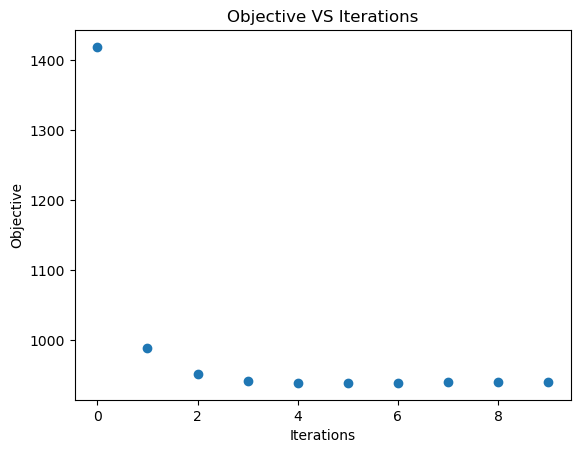

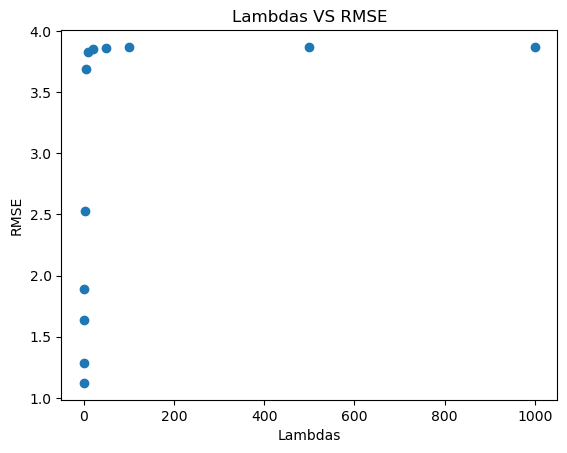

In [131]:
def evaluate():
    lbda = 1
    objective, U, V = train(0.1, 1, 10)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(range(len(objective)), objective)#, s=10, c='b', marker='s')
    ax.set_title("Objective VS Iterations")
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Objective')
    


    X = np.dot(U, V.T)
    rmse1 = rmse(X)
    lmbds = [0.001, 0.01, 0.1, 0.5, 2, 5, 10, 20, 50, 100, 500, 1000]
    error = []
    for l in lmbds:
        if l < 1:
            _, U, V = train(0.1 * l, l, 10)
        else:
            _, U, V = train(0.2/l, l, 10)
        X = np.dot(U, V.T)
        r = rmse(X)
        error.append(r)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(lmbds, error)#, s=10, c='b', marker='s')
    
    ax.set_title("Lambdas VS RMSE")
    ax.set_xlabel('Lambdas')
    ax.set_ylabel('RMSE')

    
evaluate()